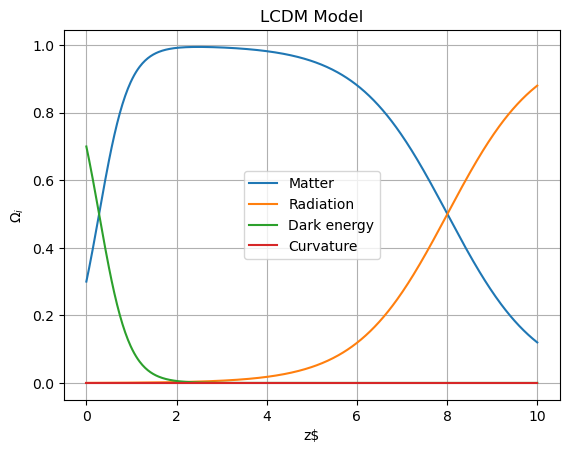

In [15]:
import sympy
import math 
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt


#Variables 
eta = np.linspace(0, -10, 500) #eta = ln(a)


#Gamma for each component \gamma = 1 + w 
Gl = 0 #LCDM
Gm, Gr, Gk = 1, 4/3, 2/3

#Initial conditions
Om0 = 0.3
Or0 = 0.0001
Ok0 = 0
Ol0 = 1 - Om0 - Or0 - Ok0


#Solution
def odes(x, eta):
  # for each component  
    Om,Or,Ol,Ok = x[0], x[1], x[2],x[3]

   # LCDM modols

    ode_m = 3*((Gm*Om+Gr*Or+Gl*Ol+Gk*Ok)-Gm)*Om
    ode_r = 3*((Gm*Om+Gr*Or+Gl*Ol+Gk*Ok)-Gr)*Or
    ode_l = 3*((Gm*Om+Gr*Or+Gl*Ol+Gk*Ok)-Gl)*Ol
    ode_k = 3*((Gm*Om+Gr*Or+Gl*Ol+Gk*Ok)-Gk)*Ok
    

    return [ode_m, ode_r, ode_l, ode_k]

# Initial conditions 
x0 = [Om0, Or0, Ol0, Ok0]
x_lcdm = odeint(odes,x0,eta)

Om_lcdm = x_lcdm[:,0]
Or_lcdm = x_lcdm[:,1]
Ol_lcdm= x_lcdm[:,2]
Ok_lcdm = x_lcdm[:,3]

z =np.linspace(0, 10, 500)

#Ploteado densidades
plt.plot(z,x_lcdm[:,0],label='Matter')
plt.plot(z,x_lcdm[:,1],label='Radiation')
plt.plot(z,x_lcdm[:,2],label='Dark energy')
plt.plot(z,x_lcdm[:,3],label='Curvature')
plt.ylabel('$\\Omega_i$')
plt.xlabel('z$')
plt.legend(loc='best')
plt.title("LCDM Model")
plt.grid()
plt.show()


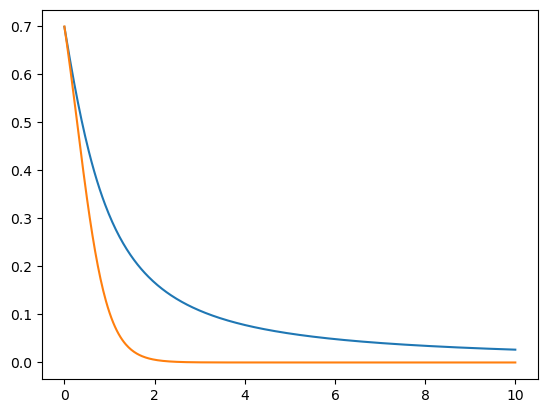

In [18]:

def modelz_6 (y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/1.0 + 1)

    return dydz  

y0 = 0.699
z_rs = np.linspace(0,10,500)
sol1 = odeint(modelz_6,y0,z_rs)

plt.plot(z_rs,sol1)
plt.plot(z,Ol_lcdm)